In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_pickle('data/saeb_treated.pkl')
df.head()

,ano,sigla_uf,escola_publica,id_aluno,situacao_censo,disciplina,proficiencia,erro_padrao,proficiencia_saeb,erro_padrao_saeb,...,escolaridade_pai_4,escolaridade_pai_5,escolaridade_pai_6,escolaridade_pai_7,possui_computador_0,possui_computador_1,possui_computador_2,possui_computador_3,possui_computador_4,possui_computador_5
274,2015,PB,1,17518688,0,MT,-0.472096,0.538400,223.577837,30.092429,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
348,2015,PB,1,17518163,0,MT,-0.809452,0.580177,204.722224,32.427443,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
408,2015,PB,1,17491526,0,LP,-0.828752,0.366511,204.326255,20.192323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
417,2015,PB,1,17523365,0,LP,-0.564052,0.351783,218.909469,19.380908,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1008,2015,PB,1,17508044,0,LP,-0.775107,0.449797,207.281739,24.780829,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [3]:
'''
columns_oi = ['possui_eletrecidade', 'possui_escrivaninha', 'responsaveis_incentivam_realizacao_licao_casa',
            'responsaveis_incentivam_estudos', 'responsaveis_incentivam_comparecer_aulas', 'tempo_chegada_escola',
            'transporte_escolar', 'tempo_lazer', 'tempo_cursos', 'tempo_estudos', 'leitura_noticias', 'leitura_livros_geral', 'leitura_historia_quadrinhos',
            'desempenho_aluno_cat']
'''

"\ncolumns_oi = ['possui_eletrecidade', 'possui_escrivaninha', 'responsaveis_incentivam_realizacao_licao_casa',\n            'responsaveis_incentivam_estudos', 'responsaveis_incentivam_comparecer_aulas', 'tempo_chegada_escola',\n            'transporte_escolar', 'tempo_lazer', 'tempo_cursos', 'tempo_estudos', 'leitura_noticias', 'leitura_livros_geral', 'leitura_historia_quadrinhos',\n            'desempenho_aluno_cat']\n"

In [8]:
print(df.columns)

Index(['ano', 'sigla_uf', 'escola_publica', 'id_aluno', 'situacao_censo',
       'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'desempenho_aluno', 'sexo', 'raca_cor',
       'ano_nascimento', 'idade', 'mae_sabe_ler_escrever', 'mae_le',
       'pai_sabe_ler_escrever', 'pai_le',
       'responsaveis_incentivam_realizacao_licao_casa',
       'responsaveis_incentivam_estudos', 'responsaveis_incentivam_leitura',
       'responsaveis_incentivam_comparecer_aulas', 'tempo_lazer',
       'leitura_jornais', 'leitura_livros_geral',
       'leitura_literatura_infantojuvenil', 'leitura_historia_quadrinhos',
       'leitura_revista_comportamento', 'leitura_revistas_geral',
       'leitura_internet', 'frequenta_biblioteca', 'frequenta_cinema',
       'frequenta_espetaculo_exposicao', 'frequenta_festas_comunidade',
       'gosta_estudar_disciplina', 'faz_licao_casa', 'correcao_licao_casa',
       'utiliza_biblioteca_escola', 'desempenho_aluno_cat',
      

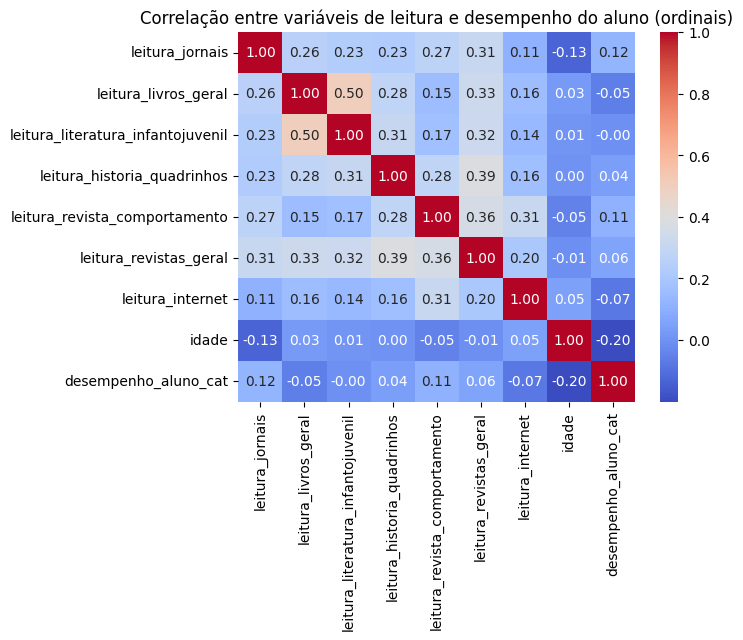

<Figure size 1000x1000 with 0 Axes>

In [69]:
# variaveis leitura_
# + variaveis idade, dessemepenho_aluno_cat

columns_oi = [col for col in df.columns if 'leitura_' in col] + ['idade', 'desempenho_aluno_cat']

corr = df[columns_oi].corr()
plt.title('Correlação entre variáveis de leitura e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

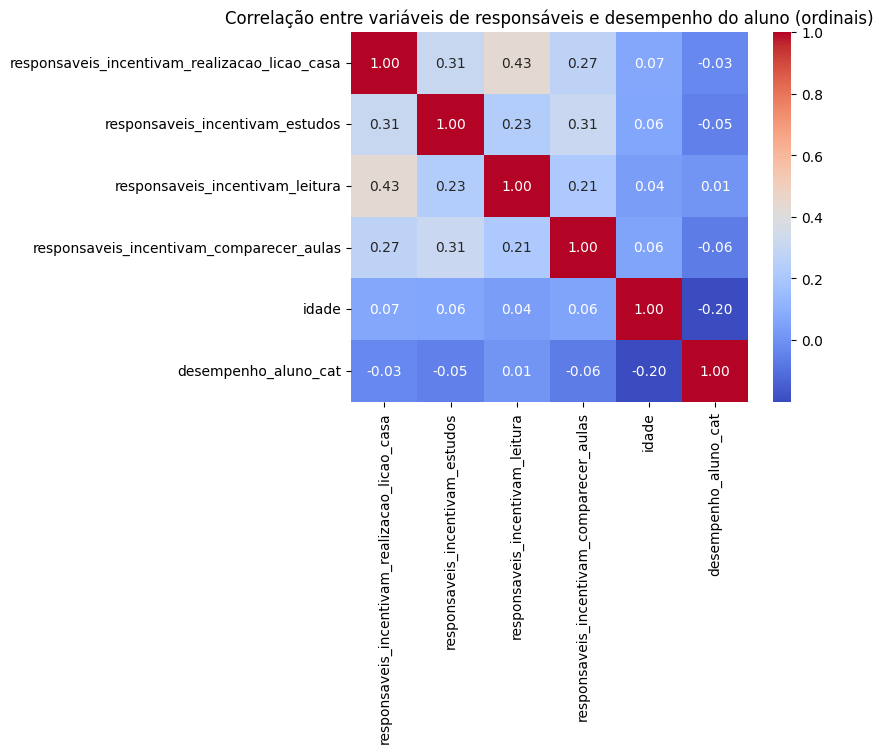

<Figure size 1000x1000 with 0 Axes>

In [70]:
# variaveis responsaveis_ + idade, desempenho_aluno_cat

columns_oi = [col for col in df.columns if 'responsaveis_' in col] + ['idade', 'desempenho_aluno_cat']

corr = df[columns_oi].corr()
plt.title('Correlação entre variáveis de responsáveis e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.figure(figsize=(10, 10))
plt.show()

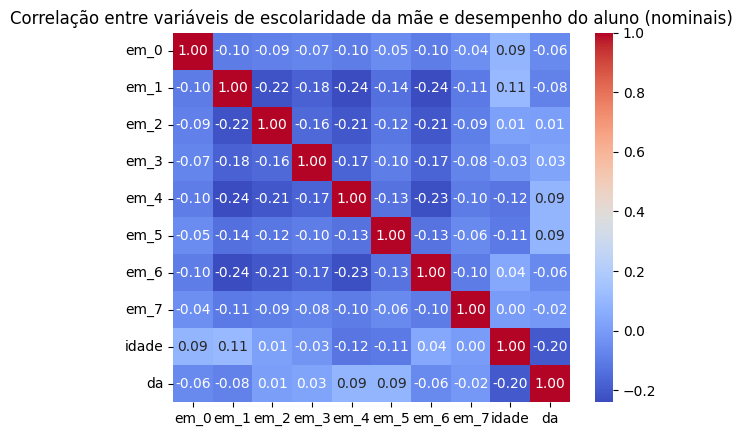

<Figure size 2000x2000 with 0 Axes>

In [71]:
# variaveis escolaridade_, possui_ + idade, desempenho_aluno_cat
# abreviando escolaridade_1, escolaridade_2 para e1, e2, ...
# abreviando possui_computador_1, possui_computador_2 para pc1, pc2, ...

columns_oi_mae = [col for col in df.columns if 'escolaridade_mae' in col] + ['idade', 'desempenho_aluno_cat']
temp_df_mae = df[columns_oi_mae].copy()

new_columns_name_mae = [col.replace('escolaridade_mae', 'em') for col in temp_df_mae.columns if 'escolaridade_mae' in col]
new_columns_name_mae += ['idade', 'desempenho_aluno_cat']

temp_df_mae.columns = new_columns_name_mae

corr_mae = temp_df_mae.rename(columns={'desempenho_aluno_cat': 'da'}).corr()
plt.title('Correlação entre variáveis de escolaridade da mãe e desempenho do aluno (nominais)')
sns.heatmap(corr_mae, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(20, 20))
plt.tight_layout()
plt.show()

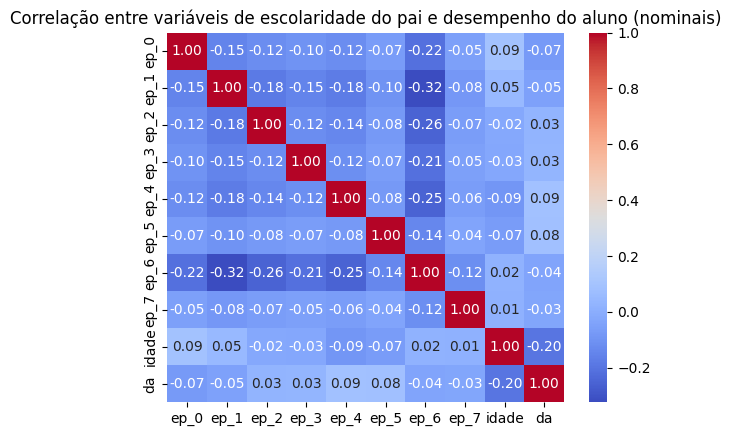

<Figure size 2000x2000 with 0 Axes>

In [72]:
# variaveis escolaridade_, possui_ + idade, desempenho_aluno_cat
# abreviando escolaridade_1, escolaridade_2 para e1, e2, ...
# abreviando possui_computador_1, possui_computador_2 para pc1, pc2, ...

columns_oi_pai = [col for col in df.columns if 'escolaridade_pai' in col] + ['idade', 'desempenho_aluno_cat']
temp_df_pai = df[columns_oi_pai].copy()

new_columns_name_pai = [col.replace('escolaridade_pai', 'ep') for col in temp_df_pai.columns if 'escolaridade_pai' in col]
new_columns_name_pai += ['idade', 'desempenho_aluno_cat']

temp_df_pai.columns = new_columns_name_pai

corr_pai = temp_df_pai.rename(columns={'desempenho_aluno_cat': 'da'}).corr()
plt.title('Correlação entre variáveis de escolaridade do pai e desempenho do aluno (nominais)')
sns.heatmap(corr_pai, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(20, 20))
plt.show()

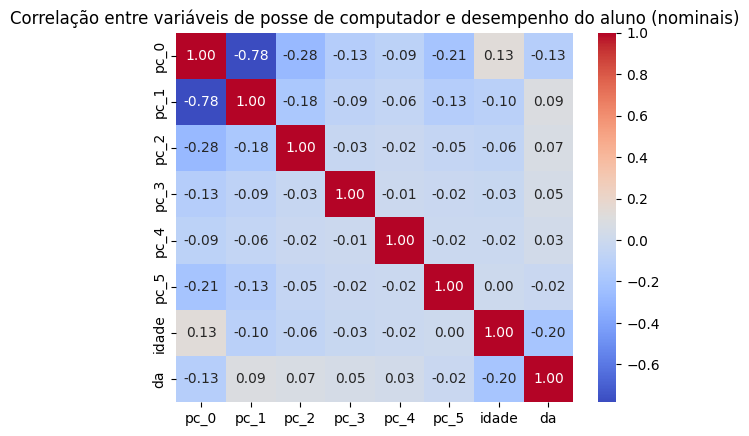

<Figure size 2000x2000 with 0 Axes>

In [73]:
# variaveis escolaridade_, possui_ + idade, desempenho_aluno_cat
# abreviando escolaridade_1, escolaridade_2 para e1, e2, ...
# abreviando possui_computador_1, possui_computador_2 para pc1, pc2, ...

columns_oi_pc = [col for col in df.columns if 'possui_computador' in col] + ['idade', 'desempenho_aluno_cat']
temp_df_pc = df[columns_oi_pc].copy()

new_columns_name_pc = [col.replace('possui_computador', 'pc') for col in temp_df_pc.columns if 'possui_computador' in col]
new_columns_name_pc += ['idade', 'desempenho_aluno_cat']

temp_df_pc.columns = new_columns_name_pc

corr_pc = temp_df_pc.rename(columns={'desempenho_aluno_cat': 'da'}).corr()
plt.title('Correlação entre variáveis de posse de computador e desempenho do aluno (nominais)')
sns.heatmap(corr_pc, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(20, 20))
plt.show()

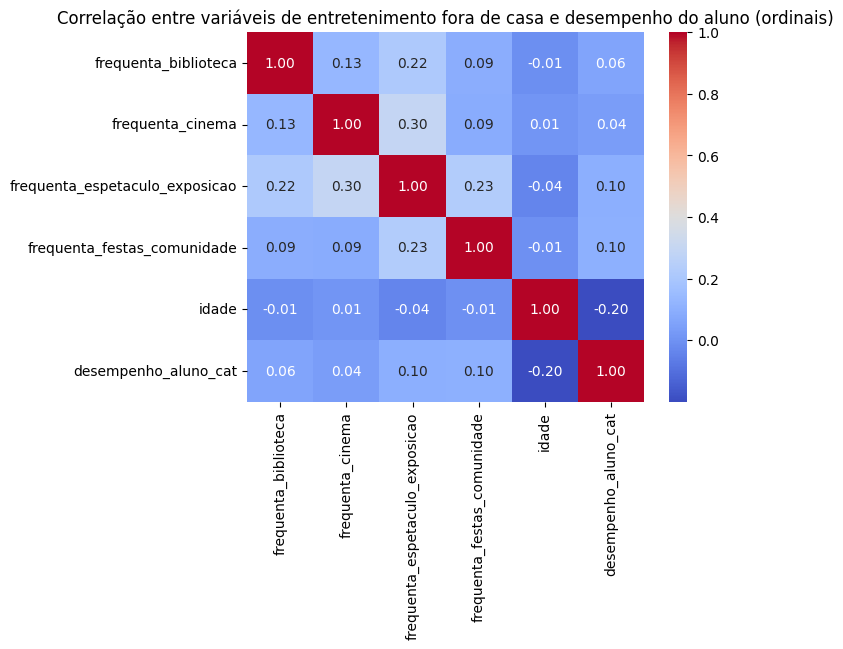

<Figure size 1000x1000 with 0 Axes>

In [74]:
# colunas 'frequenta_'

columns_oi = [col for col in df.columns if 'frequenta_' in col] + ['idade', 'desempenho_aluno_cat']

corr = df[columns_oi].corr()
plt.title('Correlação entre variáveis de entretenimento fora de casa e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

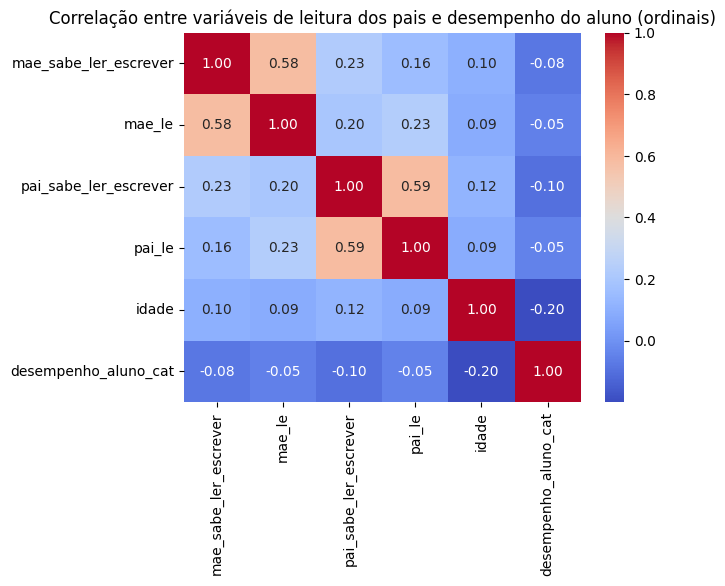

<Figure size 1000x1000 with 0 Axes>

In [75]:
# colunas de leitura dos pais (nível de escolaridade)

columns_oi = ['mae_sabe_ler_escrever', 'mae_le', 'pai_sabe_ler_escrever', 'pai_le'] + ['idade', 'desempenho_aluno_cat']

corr = df[columns_oi].corr()
plt.title('Correlação entre variáveis de leitura dos pais e desempenho do aluno (ordinais)')
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.figure(figsize=(10, 10))
plt.show()

Index(['idade', 'tempo_lazer', 'gosta_estudar_disciplina', 'faz_licao_casa',
       'correcao_licao_casa', 'utiliza_biblioteca_escola',
       'desempenho_aluno_cat'],
      dtype='object')


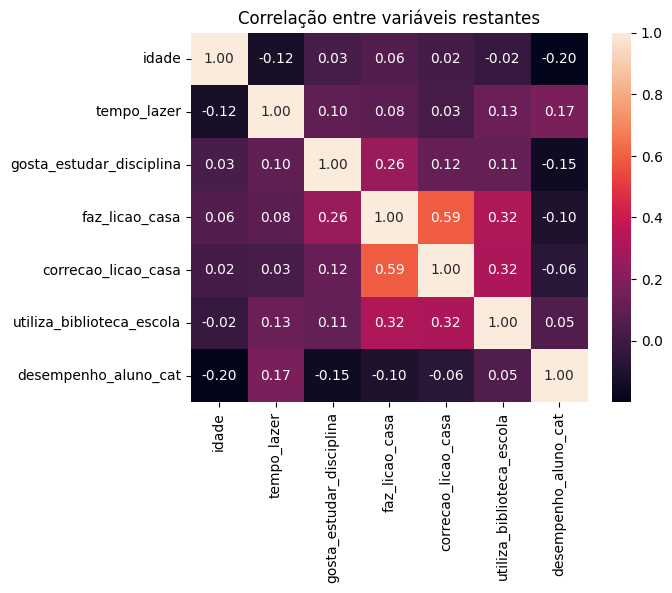

<Figure size 2000x2000 with 0 Axes>

In [76]:
# heatmap for columns relationship
exclude = ['ano', 'sigla_uf', 'escola_publica', 'id_aluno', 'situacao_censo',
       'disciplina', 'proficiencia', 'erro_padrao', 'proficiencia_saeb',
       'erro_padrao_saeb', 'desempenho_aluno', 'sexo', 'raca_cor',
       'ano_nascimento','escolaridade_mae_0', 'escolaridade_mae_1', 'escolaridade_mae_2',
       'escolaridade_mae_3', 'escolaridade_mae_4', 'escolaridade_mae_5',
       'escolaridade_mae_6', 'escolaridade_mae_7', 'escolaridade_pai_0',
       'escolaridade_pai_1', 'escolaridade_pai_2', 'escolaridade_pai_3',
       'escolaridade_pai_4', 'escolaridade_pai_5', 'escolaridade_pai_6',
       'escolaridade_pai_7', 'possui_computador_0', 'possui_computador_1',
       'possui_computador_2', 'possui_computador_3', 'possui_computador_4',
       'possui_computador_5']

exclude += [col for col in df.columns if 'leitura_' in col]
exclude += [col for col in df.columns if 'responsaveis_' in col]
exclude += [col for col in df.columns if 'frequenta_' in col]
exclude += ['mae_sabe_ler_escrever', 'mae_le', 'pai_sabe_ler_escrever', 'pai_le']

print(df.drop(exclude, axis=1).columns)

corr = df.drop(exclude, axis=1).corr()
plt.title('Correlação entre variáveis restantes')
sns.heatmap(corr, annot=True, fmt=".2f")
plt.figure(figsize=(20, 20))
plt.show()